# Importação das bibliotecas

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')

# Carregamento dos dataset de resultados

In [130]:
#usuario= "igorcapeletti"
usuario= "igorubuntu"

raiz= f"/home/{usuario}/github/tcc_eBPF_XDP/graficos"

#pasta de resultados gerais para programas eBPF: ----------------
#pasta_resultado_ebpf= 'resultados1'
#pasta_resultado_ebpf= 'resultados2'
pasta_resultado_ebpf= 'resultados3'
#pasta_resultado_ebpf= 'resultados4'
raiz_ebpf= f"/home/{usuario}/github/tcc_eBPF_XDP/experimentos/{pasta_resultado_ebpf}"


#pasta de resultados gerais para programas AF_XDP: ----------------
#pasta_resultado_af_xdp= 'resultados_af_xdp1'
pasta_resultado_af_xdp= 'resultados_af_xdp2'
raiz_af_xdp= f"/home/{usuario}/github/tcc_eBPF_XDP/experimentos/{pasta_resultado_af_xdp}"


#carregamento dos arquivos CSV dos resultados dos programas eBPF: ----------------
df_gerador_ebpf = pd.read_csv(f'{raiz_ebpf}/resultado_geral_gerador.csv', sep=',', engine='python')
df_perf_ebpf = pd.read_csv(f'{raiz_ebpf}/resultado_geral_perf.csv', sep=',', engine='python')
df_sar_ebpf = pd.read_csv(f'{raiz_ebpf}/resultado_geral_sar.csv', sep=',', engine='python')
df_gerador_ebpf.loc[:,'tipo_programa']= 'ebpf'
df_perf_ebpf.loc[:,'tipo_programa']= 'ebpf'
df_sar_ebpf.loc[:,'tipo_programa']= 'ebpf'

#carregamento dos arquivos CSV dos resultados dos programas AF_XDP: ----------------
df_gerador_af_xdp = pd.read_csv(f'{raiz_af_xdp}/resultado_geral_gerador.csv', sep=',', engine='python')
df_perf_af_xdp = pd.read_csv(f'{raiz_af_xdp}/resultado_geral_perf.csv', sep=',', engine='python')
df_sar_af_xdp = pd.read_csv(f'{raiz_af_xdp}/resultado_geral_sar.csv', sep=',', engine='python')
df_gerador_af_xdp.loc[:,'tipo_programa']= 'af_xdp'
df_perf_af_xdp.loc[:,'tipo_programa']= 'af_xdp'
df_sar_af_xdp.loc[:,'tipo_programa']= 'af_xdp'

#normalizacao dos dados af_xdp
df_gerador_af_xdp['hook_ebpf']= df_gerador_af_xdp['hook_ebpf'].replace('xdpgeneric','af_xdp')
df_perf_af_xdp['hook_ebpf']= df_perf_af_xdp['hook_ebpf'].replace('xdpgeneric','af_xdp')
df_sar_af_xdp['hook_ebpf']= df_sar_af_xdp['hook_ebpf'].replace('xdpgeneric','af_xdp')


#concatenação dos dataframes referentes a cada analise (ebpf+af_xdp)
df_gerador= pd.concat([df_gerador_ebpf,df_gerador_af_xdp], sort = False)
df_perf= pd.concat([df_perf_ebpf,df_perf_af_xdp], sort = False)
df_sar= pd.concat([df_sar_ebpf,df_sar_af_xdp], sort = False)


format_imagens= '.jpg'

In [131]:
lista_combined= [1,2,4,8]

lista_for= ['for_0_a_0','for_0_a_1','for_0_a_100','for_0_a_200','for_0_a_400','for_0_a_800','for_0_a_1600','for_0_a_3200','for_0_a_6400','for_0_a_12800']
lista_alias_for= ['0','1','100','200','400','800','1600','3200','6400','12800']

lista_hook_xdp= ['xdpgeneric','xdpdvr','af_xdp']

lista_pacotes= [64,128,256,512,1024,1500]
lista_alias_pacotes= ['64B','128B','256B','512B','1024B','1500B']

lista_tipo_programa= ['ebpf','af_xdp']

# Normalização dos datasets

In [133]:
#antes de executar isso, eliminar ultima coluna dos arquivos perf que estão em branco

#normalizacao para alterar o nome do algoritmo for_0_a_0 para base-line
#df_gerador['algoritmo']= df_gerador['algoritmo'].replace('for_0_a_0','base-line')
#df_perf['algoritmo']= df_perf['algoritmo'].replace('for_0_a_0','base-line')
#df_sar['algoritmo']= df_sar['algoritmo'].replace('for_0_a_0','base-line')

for i,j in zip(lista_for,lista_alias_for):
       df_gerador['algoritmo']= df_gerador['algoritmo'].replace(f'{i}',f'{j}')
       df_perf['algoritmo']= df_perf['algoritmo'].replace(f'{i}',f'{j}')
       df_sar['algoritmo']= df_sar['algoritmo'].replace(f'{i}',f'{j}')

df_gerador['algoritmo']= df_gerador['algoritmo'].astype(int)
df_perf['algoritmo']= df_perf['algoritmo'].astype(int)
df_sar['algoritmo']= df_sar['algoritmo'].astype(int)

df_gerador['latencymean']= df_gerador['latencymean']*-1


colunas= ['combined', 'algoritmo', 'packet_size', 'hook_ebpf', 'var_ip',
       'timeout', 'task_clock', 'context_switches', 'cpu_migrations',
       'page_faults', 'cycles', 'instructions', 'branches', 'branch_misses',
       'L1_dcache_loads', 'L1_dcache_load_misses', 'LLC_loads',
       'LLC_load_misses', 'L1_icache_load_misses', 'dTLB_loads',
       'dTLB_load_misses', 'iTLB_loads', 'iTLB_load_misses', 'tipo_programa']
for i in colunas:
  df_perf[f'{i}']= df_perf[f'{i}'].astype(str)

df_perf= df_perf.replace('<notcounted>','0')
df_perf= df_perf.replace('.','')

colunas= ['task_clock', 'context_switches', 'cpu_migrations',
       'page_faults', 'cycles', 'instructions', 'branches', 'branch_misses',
       'L1_dcache_loads', 'L1_dcache_load_misses', 'LLC_loads',
       'LLC_load_misses', 'L1_icache_load_misses', 'dTLB_loads',
       'dTLB_load_misses', 'iTLB_loads', 'iTLB_load_misses']

for i in colunas:
  df_perf[f'{i}']= df_perf[f'{i}'].astype(int)

df_gerador

,combined,algoritmo,packet_size,hook_ebpf,var_ip,timeout,rx_packets,rx_packet_rate_avg,rx_packet_rate,latencymean,tipo_programa
0,4,0,64,xdpdrv,0.0.0.255,60,760316986,12109744.59,12778451.90,0.00,ebpf
1,2,0,64,xdpdrv,0.0.0.255,60,744478760,11764705.89,12512292.12,0.00,ebpf
2,2,0,1024,xdpdrv,0.0.0.255,60,71356005,1874999.98,1199262.16,0.00,ebpf
3,1,0,64,xdpgeneric,0.0.0.255,60,64108224,606187.30,1077450.49,-115.64,ebpf
4,4,0,512,xdpgeneric,0.0.0.255,60,140012459,5405405.27,2353160.57,-17.65,ebpf
...,...,...,...,...,...,...,...,...,...,...,...
235,8,1600,512,af_xdp,0.0.0.255,60,5359444,0.00,90074.78,0.03,af_xdp
236,8,1600,64,af_xdp,0.0.0.255,60,5543156,0.00,93162.24,-891.60,af_xdp
237,1,1600,1500,af_xdp,0.0.0.255,60,6170371,649350.66,103704.04,0.03,af_xdp
238,2,1600,1500,af_xdp,0.0.0.255,60,5990590,0.00,100682.41,0.03,af_xdp


# Resultados do gerador

### As avaliações de ***Latência***, ***Vazão*** e ***uso de CPU*** serão avaliados em 4 grupos gerais:
#### 1. Número de filas TX/RX de processamento
#### 2. Modos de hook XDP
#### 3. Tamanho dos laços de repetição dos algoritmos
#### 4. Tamanho dos pacotes
---

In [249]:
format_imagens= '.pdf'

## 1. Número de filas TX/RX de processamento

a) Qual a ***Taxa de Transferência*** que as filas TX/RX de processamento conseguem obter para o algoritmo base-line nos diferentes modos ebpf?

b) Qual a ***Taxa de Transferência*** que as filas TX/RX de processamento conseguem obter para o algoritmo com baixa complexidade (100 iterações) nos diferentes modos ebpf?

c) Qual a ***Taxa de Transferência*** que as filas TX/RX de processamento conseguem obter para o algoritmo com média complexidade (1600 iterações) nos diferentes modos ebpf?

d) Qual a ***Taxa de Transferência*** que as filas TX/RX de processamento conseguem obter para o algoritmo com alta complexidade (12800 iterações) nos diferentes modos ebpf?

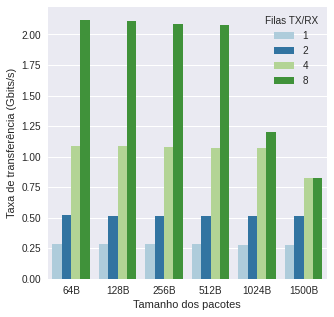

In [255]:
algoritmo= 800
hook_ebpf= 'xdpgeneric'
#hook_ebpf= 'xdpdrv'
#hook_ebpf= 'af_xdp'

eixo_x= 'packet_size'
eixo_y= 'rx_packet_rate'
hue= 'combined'

plt.rc('figure', figsize=(5, 5))
df_gerador= df_gerador.sort_values(by=[eixo_x], ascending=True)              #ordena dados por tamanho dos pacotes

df_pergunta1= df_gerador.copy()
df_pergunta1['packet_size']= df_pergunta1['packet_size'].astype(str)
for i,j in zip(lista_pacotes,lista_alias_pacotes):
       df_pergunta1['packet_size']= df_pergunta1['packet_size'].replace(f'{i}',f'{j}')
       
df_pergunta1= df_pergunta1[df_pergunta1.algoritmo == algoritmo]              #selecionar linhas do algoritmo especifico
df_pergunta1= df_pergunta1[df_pergunta1.hook_ebpf == hook_ebpf]              #selecionar linhas do modo XDP especifico
df_pergunta1['rx_packet_rate']= df_pergunta1['rx_packet_rate']/1000000       #divisao por 1 Gbit
df_pergunta1= df_pergunta1[[eixo_x, eixo_y, hue]]

ax = sns.barplot(y=eixo_y, x=eixo_x, hue=hue, data=df_pergunta1, palette='Paired');                      #grafico de barras
#ax = sns.lineplot(y=eixo_y, x=eixo_x, hue=hue, data=df_pergunta1, palette='Paired', marker='o');        #grafico de linhas
ax.set_ylabel('Taxa de transferência (Gbits/s)')
ax.set_xlabel("Tamanho dos pacotes")
ax.legend(title = 'Filas TX/RX')
save_image= ax.get_figure()
save_image.savefig(f'{raiz}/barra_dif_combined_para_dif_packet_size@algoritmo_{algoritmo}_hook_ebpf_{hook_ebpf}{format_imagens}')


e) Qual a ***Taxa de Transferência*** que as filas TX/RX de processamento conseguem obter para cada modo xdp nos diferentes algoritmos?

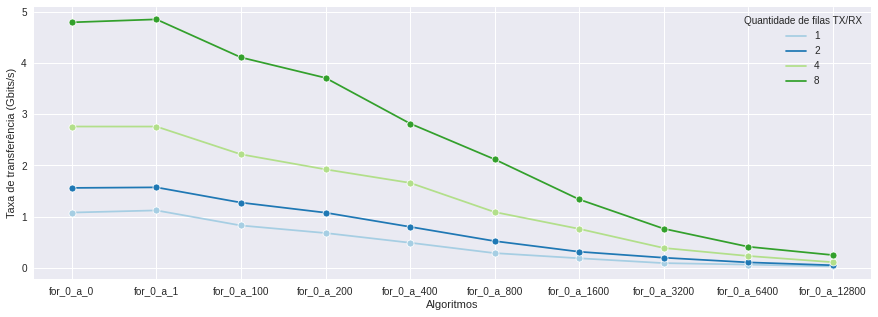

In [81]:
#Analise individual por pacote e modo xdp:
packet_size= 64
hook_ebpf= 'xdpgeneric'
#hook_ebpf= 'xdpdrv'
#hook_ebpf= 'af_xdp'

eixo_x= 'algoritmo'
eixo_y= 'rx_packet_rate'
hue= 'combined'

plt.rc('figure', figsize=(15,5))
df_pergunta1= df_gerador.copy()

df_pergunta1= df_pergunta1[df_pergunta1.packet_size == packet_size]
df_pergunta1= df_pergunta1[df_pergunta1.hook_ebpf == hook_ebpf]
df_pergunta1['rx_packet_rate']= df_pergunta1['rx_packet_rate']/1000000
df_pergunta1= df_pergunta1.sort_values(by=[eixo_x], ascending=True)

df_pergunta1['algoritmo']= df_pergunta1['algoritmo'].astype(str)
for i,j in zip(lista_alias_for,lista_for):
       df_pergunta1['algoritmo']= df_pergunta1['algoritmo'].replace(f'{i}',f'{j}')


df_pergunta1= df_pergunta1[[eixo_x, eixo_y, hue]]

ax = sns.lineplot(y=eixo_y, x=eixo_x, hue=hue, data=df_pergunta1, palette='Paired', marker='o');
#ax = sns.barplot(y=eixo_y, x=eixo_x, hue=hue, data=df_pergunta1, palette='Paired');
ax.set_ylabel('Taxa de transferência (Gbits/s)')
ax.set_xlabel("Algoritmos")
#ax.set_xticklabels(lista_for)
ax.legend(title = 'Quantidade de filas TX/RX')

save_image= ax.get_figure()
save_image.savefig(f'{raiz}/barra_dif_combined_para_dif_algoritmo@packet_size_{packet_size}_hook_ebpf_{hook_ebpf}{format_imagens}')

### 1.2 Qual a ***Latência*** que as filas TX/RX de processamento obtem?

In [1]:
algoritmo= 12800
hook_ebpf= 'xdpgeneric'

eixo_x= 'packet_size'
eixo_y= 'latencymean'
hue= 'combined'

plt.rc('figure', figsize=(10, 5))
df_pergunta1= df_gerador[df_gerador.algoritmo == algoritmo]
df_pergunta1= df_pergunta1[df_pergunta1.hook_ebpf == hook_ebpf]
df_pergunta1= df_pergunta1.sort_values(by=[hue,eixo_x], ascending=True)
df_pergunta1= df_pergunta1[[eixo_x, eixo_y, hue]]

ax = sns.barplot(y=eixo_y, x=eixo_x, hue=hue, data=df_pergunta1, palette='Paired');
ax.set_title(f'Vazão que cada fila TX/RX obtem sobre diferentes tamanhos de pacotes,\nalgoritmo = {algoritmo}, hook XDP = {hook_ebpf}', fontsize=12, pad=20);
ax.set_ylabel('Latência (ms)')
ax.set_xlabel("Tamanho dos pacotes")
ax.legend(title = 'Filas TX/RX de processamento')
save_image= ax.get_figure()
save_image.savefig(f'{raiz}/barra_dif_combined_para_dif_packet_size@algoritmo_{algoritmo}_hook_ebpf_{hook_ebpf}{format_imagens}')

NameError: name 'plt' is not defined

### 1.3 Qual o ***uso de CPU*** obtido ao aumentar as filas TX/RX de processamento?

## 2. Modos de hook XDP

### 2.1 Qual a ***Vazão*** obtida por cada modo XDP?

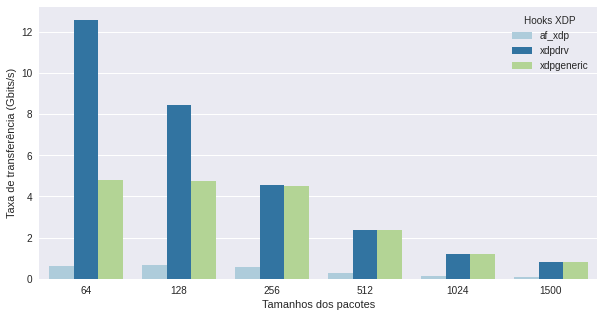

In [222]:
combined= 8
algoritmo= 0

eixo_x= 'packet_size'
eixo_y= 'rx_packet_rate'
hue= 'hook_ebpf'

plt.rc('figure', figsize=(10, 5))
df_pergunta1= df_gerador[df_gerador.combined == combined]
df_pergunta1= df_pergunta1[df_pergunta1.algoritmo == algoritmo]
df_pergunta1['rx_packet_rate']= df_pergunta1['rx_packet_rate']/1000000
df_pergunta1= df_pergunta1.sort_values(by=[hue,eixo_y], ascending=True)
df_pergunta1= df_pergunta1[[eixo_x, eixo_y, hue]]

ax = sns.barplot(y=eixo_y, x=eixo_x, hue=hue, data=df_pergunta1, palette='Paired');
ax.set_ylabel('Taxa de transferência (Gbits/s)')
ax.set_xlabel('Tamanhos dos pacotes')
ax.legend(title = "Hooks XDP")
save_image= ax.get_figure()
save_image.savefig(f'{raiz}/barra_dif_hooks_para_dif_tam_packets@combined{combined}_algoritmo_{algoritmo}{format_imagens}')

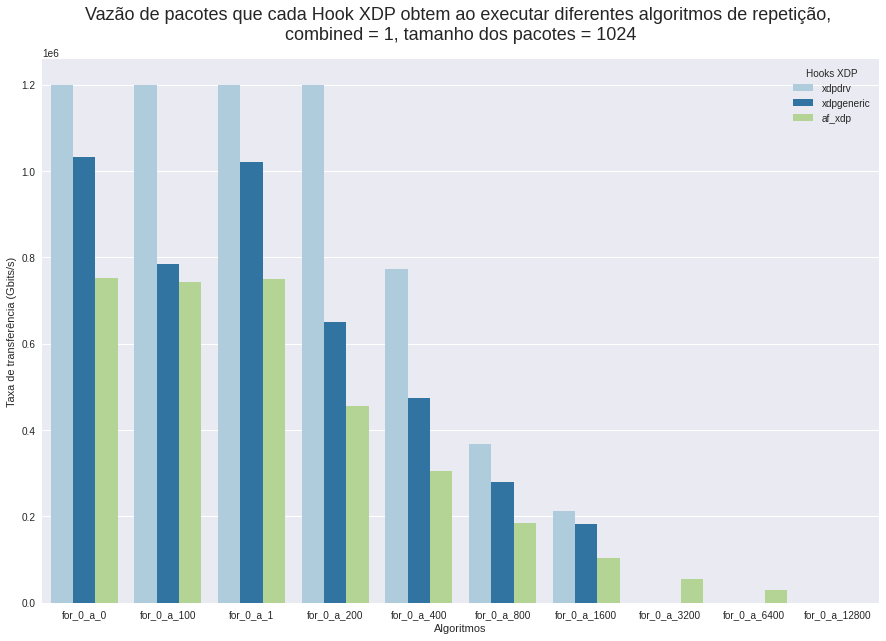

In [142]:
combined=1
packet_size= 1024

eixo_x= 'algoritmo'
eixo_y= 'rx_packet_rate'
hue= 'hook_ebpf'

plt.rc('figure', figsize=(15, 10))
df_pergunta1= df_gerador[df_gerador.combined == combined]
df_pergunta1= df_pergunta1[df_pergunta1.packet_size == packet_size]
df_pergunta1= df_pergunta1.sort_values(by=[eixo_y,eixo_x], ascending=False)
df_pergunta1= df_pergunta1[[eixo_x, eixo_y, hue]]

ax = sns.barplot(y=eixo_y, x=eixo_x, hue=hue, data=df_pergunta1, palette='Paired');
ax.set_title(f'Vazão de pacotes que cada Hook XDP obtem ao executar diferentes algoritmos de repetição, \ncombined = {combined}, tamanho dos pacotes = {packet_size}', fontsize=18, pad=20);
ax.set_ylabel('Taxa de transferência (Gbits/s)')
ax.set_xlabel('Algoritmos')
ax.legend(title = "Hooks XDP")
save_image= ax.get_figure()
save_image.savefig(f'{raiz}/barra_dif_{hue}_para_dif_{eixo_x}@combined_{combined}_packet_size_{packet_size}{format_imagens}')

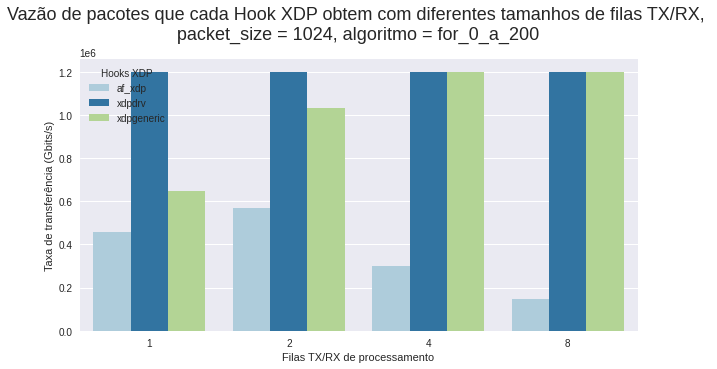

In [101]:
packet_size= 1024
algoritmo= 'for_0_a_200'

eixo_x= 'combined'
eixo_y= 'rx_packet_rate'
hue= 'hook_ebpf'

plt.rc('figure', figsize=(10, 5))
df_pergunta1= df_gerador[df_gerador.packet_size == packet_size]
df_pergunta1= df_pergunta1[df_pergunta1.algoritmo == algoritmo]
df_pergunta1= df_pergunta1.sort_values(by=[hue,eixo_x], ascending=True)
df_pergunta1= df_pergunta1[[eixo_x, eixo_y, hue]]

ax = sns.barplot(y=eixo_y, x=eixo_x, hue=hue, data=df_pergunta1, palette='Paired');
ax.set_title(f'Vazão de pacotes que cada Hook XDP obtem com diferentes tamanhos de filas TX/RX, \npacket_size = {packet_size}, algoritmo = {algoritmo}', fontsize=18, pad=20);
ax.set_ylabel('Taxa de transferência (Gbits/s)')
ax.set_xlabel('Filas TX/RX de processamento')
ax.legend(title = "Hooks XDP")
save_image= ax.get_figure()
save_image.savefig(f'{raiz}/barra_dif_hooks_para_dif_combined@packet_size{packet_size}_algoritmo_{algoritmo}{format_imagens}')

### 3.1 Qual a ***Vazão*** obtida por laço de repetição

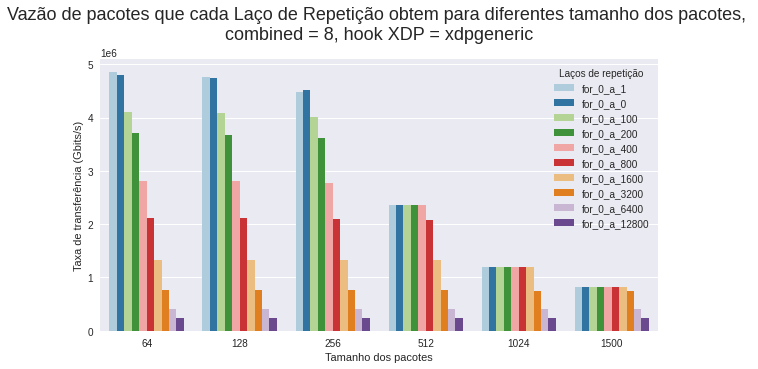

In [154]:
combined=8
hook_ebpf= 'xdpgeneric'

eixo_x= 'packet_size'
eixo_y= 'rx_packet_rate'
hue= 'algoritmo'

plt.rc('figure', figsize=(10, 5))
df_pergunta1= df_gerador[df_gerador.combined == combined]
df_pergunta1= df_pergunta1[df_pergunta1.hook_ebpf == hook_ebpf]
df_pergunta1= df_pergunta1.sort_values(by=[eixo_y,hue], ascending=False)
df_pergunta1= df_pergunta1[[eixo_x, eixo_y, hue]]

ax = sns.barplot(y=eixo_y, x=eixo_x, hue=hue, data=df_pergunta1, palette='Paired');
ax.set_title(f'Vazão de pacotes que cada Laço de Repetição obtem para diferentes tamanho dos pacotes, \ncombined = {combined}, hook XDP = {hook_ebpf}', fontsize=18, pad=20);
ax.set_ylabel('Taxa de transferência (Gbits/s)')
ax.set_xlabel('Tamanho dos pacotes')
ax.legend(title = "Laços de repetição")
save_image= ax.get_figure()
save_image.savefig(f'{raiz}/barra_dif_for_para_dif_packet_size@combined_{combined}_hook_ebpf_{hook_ebpf}{format_imagens}')

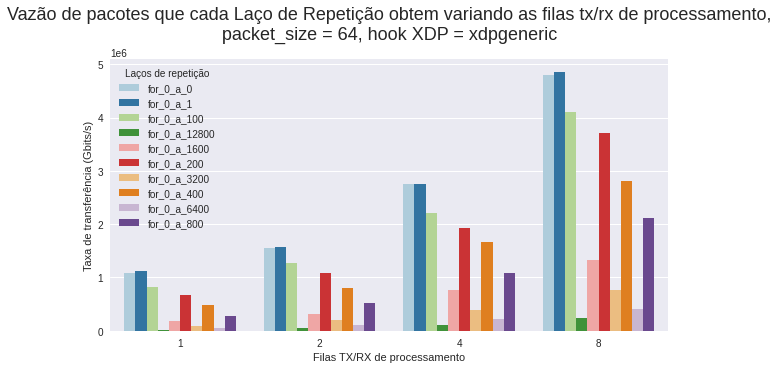

In [105]:
packet_size=64
hook_ebpf= 'xdpgeneric'

eixo_x= 'combined'
eixo_y= 'rx_packet_rate'
hue= 'algoritmo'

plt.rc('figure', figsize=(10, 5))
df_pergunta1= df_gerador[df_gerador.packet_size == packet_size]
df_pergunta1= df_pergunta1[df_pergunta1.hook_ebpf == hook_ebpf]
df_pergunta1= df_pergunta1.sort_values(by=[hue,eixo_x], ascending=True)
df_pergunta1= df_pergunta1[[eixo_x, eixo_y, hue]]

ax = sns.barplot(y=eixo_y, x=eixo_x, hue=hue, data=df_pergunta1, palette='Paired');
ax.set_title(f'Vazão de pacotes que cada Laço de Repetição obtem variando as filas tx/rx de processamento,\npacket_size = {packet_size}, hook XDP = {hook_ebpf}', fontsize=18, pad=20);
ax.set_ylabel('Taxa de transferência (Gbits/s)')
ax.set_xlabel('Filas TX/RX de processamento')
ax.legend(title = "Laços de repetição")
save_image= ax.get_figure()
save_image.savefig(f'{raiz}/barra_dif_for_para_dif_combined@packet_size_{packet_size}_hook_ebpf_{hook_ebpf}{format_imagens}')

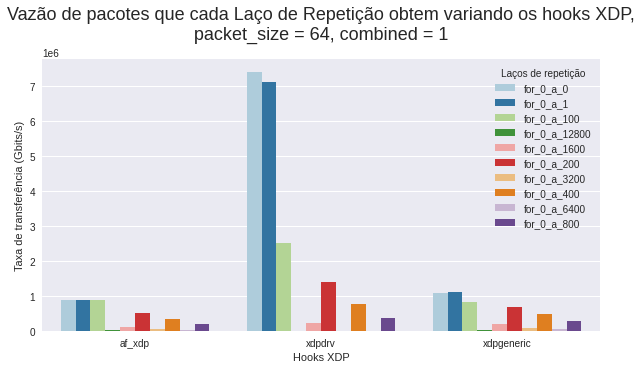

In [106]:
packet_size=64
combined= 1

eixo_x= 'hook_ebpf'
eixo_y= 'rx_packet_rate'
hue= 'algoritmo'

plt.rc('figure', figsize=(10, 5))
df_pergunta1= df_gerador[df_gerador.packet_size == packet_size]
df_pergunta1= df_pergunta1[df_pergunta1.combined == combined]
df_pergunta1= df_pergunta1.sort_values(by=[hue,eixo_x], ascending=True)
df_pergunta1= df_pergunta1[[eixo_x, eixo_y, hue]]

ax = sns.barplot(y=eixo_y, x=eixo_x, hue=hue, data=df_pergunta1, palette='Paired');
ax.set_title(f'Vazão de pacotes que cada Laço de Repetição obtem variando os hooks XDP,\npacket_size = {packet_size}, combined = {combined}', fontsize=18, pad=20);
ax.set_ylabel('Taxa de transferência (Gbits/s)')
ax.set_xlabel('Hooks XDP')
ax.legend(title = "Laços de repetição")
save_image= ax.get_figure()
save_image.savefig(f'{raiz}/barra_dif_for_para_dif_hook_ebpf@packet_size_{packet_size}_combined_{combined}{format_imagens}')

### 4.1 Qual a ***Vazão*** obtida por tamanho de pacote 

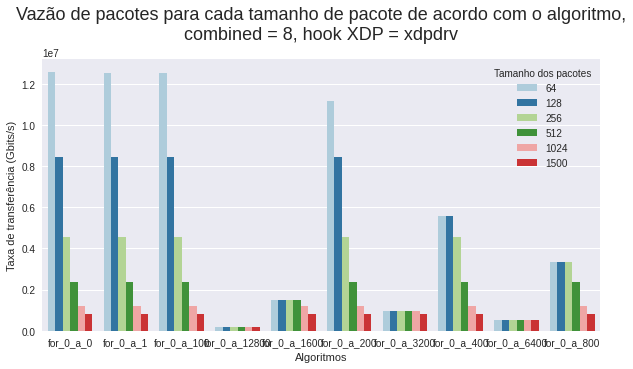

In [107]:
combined=8
hook_ebpf= 'xdpdrv'

eixo_x= 'algoritmo'
eixo_y= 'rx_packet_rate'
hue= 'packet_size'

plt.rc('figure', figsize=(10, 5))
df_pergunta1= df_gerador[df_gerador.combined == combined]
df_pergunta1= df_pergunta1[df_pergunta1.hook_ebpf == hook_ebpf]
df_pergunta1= df_pergunta1.sort_values(by=[hue,eixo_x], ascending=True)
df_pergunta1= df_pergunta1[[eixo_x, eixo_y, hue]]

ax = sns.barplot(y=eixo_y, x=eixo_x, hue=hue, data=df_pergunta1, palette='Paired');
ax.set_title(f'Vazão de pacotes para cada tamanho de pacote de acordo com o algoritmo,\ncombined = {combined}, hook XDP = {hook_ebpf}', fontsize=18, pad=20);
ax.set_ylabel('Taxa de transferência (Gbits/s)')
ax.set_xlabel('Algoritmos')
ax.legend(title = 'Tamanho dos pacotes')
save_image= ax.get_figure()
save_image.savefig(f'{raiz}/barra_dif_packet_size_para_dif_for@combined_{combined}_hook_ebpf_{hook_ebpf}{format_imagens}')

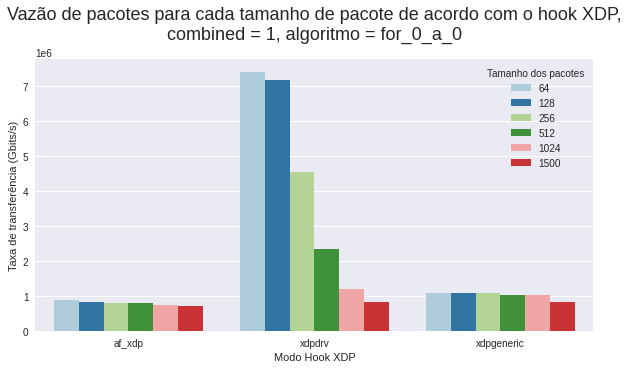

In [108]:
combined=1
algoritmo= 'for_0_a_0'

eixo_x= 'hook_ebpf'
eixo_y= 'rx_packet_rate'
hue= 'packet_size'

plt.rc('figure', figsize=(10, 5))
df_pergunta1= df_gerador[df_gerador.combined == combined]
df_pergunta1= df_pergunta1[df_pergunta1.algoritmo == algoritmo]
df_pergunta1= df_pergunta1.sort_values(by=[hue,eixo_x], ascending=True)
df_pergunta1= df_pergunta1[[eixo_x, eixo_y, hue]]

ax = sns.barplot(y=eixo_y, x=eixo_x, hue=hue, data=df_pergunta1, palette='Paired');
ax.set_title(f'Vazão de pacotes para cada tamanho de pacote de acordo com o hook XDP,\ncombined = {combined}, algoritmo = {algoritmo}', fontsize=18, pad=20);
ax.set_ylabel('Taxa de transferência (Gbits/s)')
ax.set_xlabel('Modo Hook XDP')
ax.legend(title = 'Tamanho dos pacotes')
save_image= ax.get_figure()
save_image.savefig(f'{raiz}/barra_dif_packet_size_para_dif_hook_ebpf@combined_{combined}_algoritmo_{algoritmo}{format_imagens}')

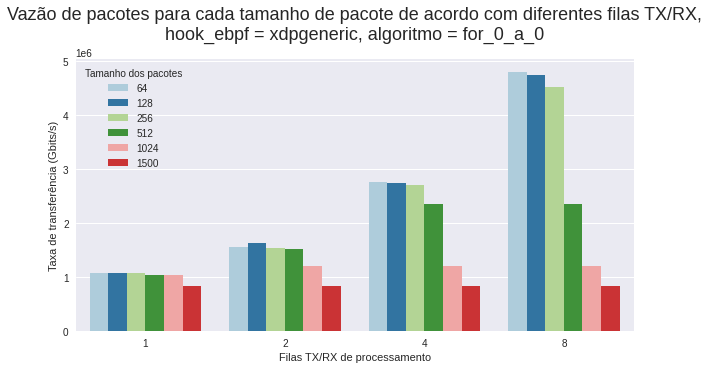

In [109]:
hook_ebpf= 'xdpgeneric'
algoritmo= 'for_0_a_0'

eixo_x= 'combined'
eixo_y= 'rx_packet_rate'
hue= 'packet_size'

plt.rc('figure', figsize=(10, 5))
df_pergunta1= df_gerador[df_gerador.hook_ebpf == hook_ebpf]
df_pergunta1= df_pergunta1[df_pergunta1.algoritmo == algoritmo]
df_pergunta1= df_pergunta1.sort_values(by=[hue,eixo_x], ascending=True)
df_pergunta1= df_pergunta1[[eixo_x, eixo_y, hue]]

ax = sns.barplot(y=eixo_y, x=eixo_x, hue=hue, data=df_pergunta1, palette='Paired');
ax.set_title(f'Vazão de pacotes para cada tamanho de pacote de acordo com diferentes filas TX/RX,\nhook_ebpf = {hook_ebpf}, algoritmo = {algoritmo}', fontsize=18, pad=20);
ax.set_ylabel('Taxa de transferência (Gbits/s)')
ax.set_xlabel('Filas TX/RX de processamento')
ax.legend(title = 'Tamanho dos pacotes')
save_image= ax.get_figure()
save_image.savefig(f'{raiz}/barra_dif_packet_size_para_dif_hook_ebpf@hook_ebpf_{hook_ebpf}_algoritmo_{algoritmo}{format_imagens}')

### 2.2 Qual a ***Latência*** obtida por cada modo de hook XDP?

### 2.3 Qual o ***uso de CPU*** por modo de hook XDP?

## 3. Tamanho dos laços de repetição dos algoritmos

### 3.2 Qual a ***Latência*** obtida por laço de repetição

### 3.3 Qual o ***uso de CPU*** por laço de repetição

## 4. Tamanho dos Pacotes

### 4.2 Qual a ***Latência*** obtida por tamanho de pacote 

### 4.3 Qual o ***uso de CPU*** obtido por tamanho de pacote 